                 datetime       temp   humidity  windspeed  hour  day  month  \
0     2023-01-01 00:00:00  12.360003  68.276652   2.501762     0    1      1   
1     2023-01-01 01:00:00  -1.326204  64.169440  12.010270     1    1      1   
2     2023-01-01 02:00:00   1.380016  25.203126  14.307361     2    1      1   
3     2023-01-01 03:00:00  13.869770  57.674065   5.923668     3    1      1   
4     2023-01-01 04:00:00   6.819385  44.045102   2.978151     4    1      1   
...                   ...        ...        ...        ...   ...  ...    ...   
8732  2023-12-30 20:00:00   0.276876  78.387442  12.268380    20   30     12   
8733  2023-12-30 21:00:00   2.722741  24.774122  22.270709    21   30     12   
8734  2023-12-30 22:00:00  10.208451  47.882916  10.952307    22   30     12   
8735  2023-12-30 23:00:00   6.473756  42.790882  29.318276    23   30     12   
8736  2023-12-31 00:00:00   1.762033  59.794095   5.260069     0   31     12   

      year  ride_requests  
0     2023 

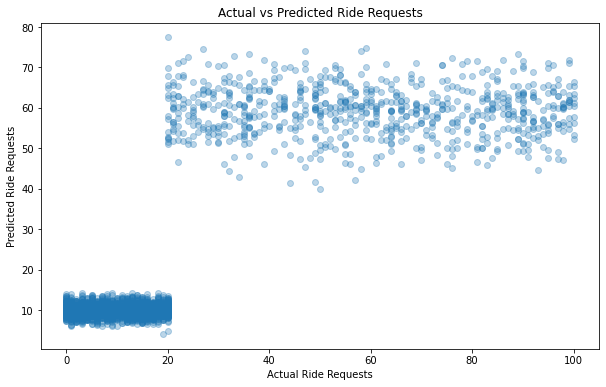

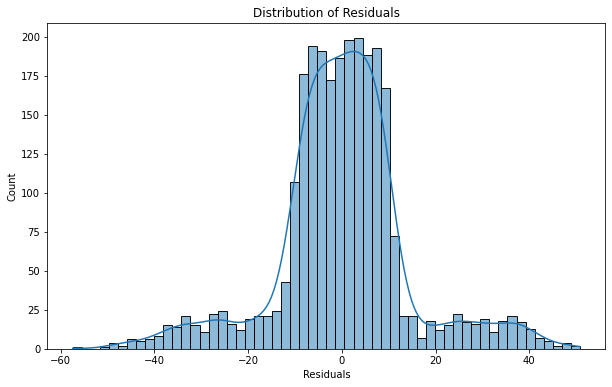

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load the dataset
url = 'bike_rides.csv'
df = pd.read_csv(url)


# Preprocess the dataset
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year
df['weekday'] = df['datetime'].dt.weekday

# Feature Selection
features = ['hour', 'day', 'month', 'year', 'weekday', 'temp', 'humidity', 'windspeed']
X = df[features]
y = df['ride_requests']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Actual Ride Requests')
plt.ylabel('Predicted Ride Requests')
plt.title('Actual vs Predicted Ride Requests')
plt.show()

# Plotting residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()
